# Importing / Reading 

Importing library modules

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import imblearn as imb
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')


Reading dataframes

In [2]:
app_train= pd.read_csv(r'C:\Users\ramad\Desktop\CODING\Spreadsheets\home-credit-default-risk\application_train.csv')
app_test= pd.read_csv(r'C:\Users\ramad\Desktop\CODING\Spreadsheets\home-credit-default-risk\application_test.csv')

bureau = pd.read_csv(r'C:\Users\ramad\Desktop\CODING\Spreadsheets\home-credit-default-risk\bureau.csv')
bureau_balance = pd.read_csv(r'C:\Users\ramad\Desktop\CODING\Spreadsheets\home-credit-default-risk\bureau_balance.csv')

credit_card_balance = pd.read_csv(r'C:\Users\ramad\Desktop\CODING\Spreadsheets\home-credit-default-risk\credit_card_balance.csv')
installments_payments = pd.read_csv(r'C:\Users\ramad\Desktop\CODING\Spreadsheets\home-credit-default-risk\installments_payments.csv')

previous_application = pd.read_csv(r'C:\Users\ramad\Desktop\CODING\Spreadsheets\home-credit-default-risk\\previous_application.csv')
POS_CASH_balance = pd.read_csv(r'C:\Users\ramad\Desktop\CODING\Spreadsheets\home-credit-default-risk\POS_CASH_balance.csv')

For simplicity's sake, transforming all column values into lower-case lettering

Note: **POS CASH BALANCE** has no str values

In [3]:
app_train.columns = app_train.columns.str.lower()
app_train.columns = app_train.columns.str.strip()

app_test.columns = app_test.columns.str.lower()
app_test.columns = app_test.columns.str.strip()

bureau.columns = bureau.columns.str.lower()
bureau.columns = bureau.columns.str.strip()

bureau_balance.columns = bureau_balance.columns.str.lower()
bureau_balance.columns = bureau_balance.columns.str.strip()

credit_card_balance.columns = credit_card_balance.columns.str.lower()
credit_card_balance.columns = credit_card_balance.columns.str.strip()
 
installments_payments.columns = installments_payments.columns.str.lower()
installments_payments.columns = installments_payments.columns.str.strip()
 
previous_application.columns = previous_application.columns.str.lower()
previous_application.columns = previous_application.columns.str.strip()

*************************************************************************************************

# First Look

*************************************************************************************************

**App Train**

**************************************************************************************************

In [4]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, sk_id_curr to amt_req_credit_bureau_year
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
app_train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
app_train.shape

(307511, 122)

In [7]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [8]:
app_train.columns.values

array(['sk_id_curr', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price',
       'name_type_suite', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type',
       'region_population_relative', 'days_birth', 'days_employed',
       'days_registration', 'days_id_publish', 'own_car_age',
       'flag_mobil', 'flag_emp_phone', 'flag_work_phone',
       'flag_cont_mobile', 'flag_phone', 'flag_email', 'occupation_type',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'weekday_appr_process_start',
       'hour_appr_process_start', 'reg_region_not_live_region',
       'reg_region_not_work_region', 'live_region_not_work_region',
       'reg_city_not_live_city', 'reg_city_not_work_city',
       'live_city_not_work_city', 'organization_type', 'ext_source_1',
       'ext_source_2', 'ext_source_3',

In [9]:
app_train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**************************************************************************************************************************************************************************************************************

**App Test**

**************************************************************************************************

In [10]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, sk_id_curr to amt_req_credit_bureau_year
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [11]:
app_test.shape

(48744, 121)

In [12]:
app_test.dtypes.value_counts()

float64    65
int64      40
object     16
Name: count, dtype: int64

In [13]:
app_test.columns.values

array(['sk_id_curr', 'name_contract_type', 'code_gender', 'flag_own_car',
       'flag_own_realty', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price', 'name_type_suite',
       'name_income_type', 'name_education_type', 'name_family_status',
       'name_housing_type', 'region_population_relative', 'days_birth',
       'days_employed', 'days_registration', 'days_id_publish',
       'own_car_age', 'flag_mobil', 'flag_emp_phone', 'flag_work_phone',
       'flag_cont_mobile', 'flag_phone', 'flag_email', 'occupation_type',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'weekday_appr_process_start',
       'hour_appr_process_start', 'reg_region_not_live_region',
       'reg_region_not_work_region', 'live_region_not_work_region',
       'reg_city_not_live_city', 'reg_city_not_work_city',
       'live_city_not_work_city', 'organization_type', 'ext_source_1',
       'ext_source_2', 'ext_source_3', 'apartments_avg'

In [14]:
app_test.head()

,sk_id_curr,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**************************************************************************************************************************************************************************************************************

**Bureau**

**************************************************************************************************

In [15]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   sk_id_curr              int64  
 1   sk_id_bureau            int64  
 2   credit_active           object 
 3   credit_currency         object 
 4   days_credit             int64  
 5   credit_day_overdue      int64  
 6   days_credit_enddate     float64
 7   days_enddate_fact       float64
 8   amt_credit_max_overdue  float64
 9   cnt_credit_prolong      int64  
 10  amt_credit_sum          float64
 11  amt_credit_sum_debt     float64
 12  amt_credit_sum_limit    float64
 13  amt_credit_sum_overdue  float64
 14  credit_type             object 
 15  days_credit_update      int64  
 16  amt_annuity             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [16]:
bureau.shape

(1716428, 17)

In [17]:
bureau.dtypes.value_counts()

float64    8
int64      6
object     3
Name: count, dtype: int64

In [18]:
bureau.columns.values

array(['sk_id_curr', 'sk_id_bureau', 'credit_active', 'credit_currency',
       'days_credit', 'credit_day_overdue', 'days_credit_enddate',
       'days_enddate_fact', 'amt_credit_max_overdue',
       'cnt_credit_prolong', 'amt_credit_sum', 'amt_credit_sum_debt',
       'amt_credit_sum_limit', 'amt_credit_sum_overdue', 'credit_type',
       'days_credit_update', 'amt_annuity'], dtype=object)

In [19]:
bureau.head()

,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


**************************************************************************************************************************************************************************************************************

**Bureau Balance**

**************************************************************************************************

In [20]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   sk_id_bureau    int64 
 1   months_balance  int64 
 2   status          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [21]:
bureau_balance.shape

(27299925, 3)

In [22]:
bureau_balance.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of sk_id_bureau       int64
months_balance     int64
status            object
dtype: object>

In [23]:
bureau_balance.columns.values

array(['sk_id_bureau', 'months_balance', 'status'], dtype=object)

In [24]:
bureau_balance.head()

,sk_id_bureau,months_balance,status
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


**************************************************************************************************************************************************************************************************************

**Credit Card Balance**

**************************************************************************************************

In [25]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   sk_id_prev                  int64  
 1   sk_id_curr                  int64  
 2   months_balance              int64  
 3   amt_balance                 float64
 4   amt_credit_limit_actual     int64  
 5   amt_drawings_atm_current    float64
 6   amt_drawings_current        float64
 7   amt_drawings_other_current  float64
 8   amt_drawings_pos_current    float64
 9   amt_inst_min_regularity     float64
 10  amt_payment_current         float64
 11  amt_payment_total_current   float64
 12  amt_receivable_principal    float64
 13  amt_recivable               float64
 14  amt_total_receivable        float64
 15  cnt_drawings_atm_current    float64
 16  cnt_drawings_current        int64  
 17  cnt_drawings_other_current  float64
 18  cnt_drawings_pos_current    float64
 19  cnt_instalment_mature

In [26]:
credit_card_balance.shape

(3840312, 23)

In [27]:
credit_card_balance.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of sk_id_prev                      int64
sk_id_curr                      int64
months_balance                  int64
amt_balance                   float64
amt_credit_limit_actual         int64
amt_drawings_atm_current      float64
amt_drawings_current          float64
amt_drawings_other_current    float64
amt_drawings_pos_current      float64
amt_inst_min_regularity       float64
amt_payment_current           float64
amt_payment_total_current     float64
amt_receivable_principal      float64
amt_recivable                 float64
amt_total_receivable          float64
cnt_drawings_atm_current      float64
cnt_drawings_current            int64
cnt_drawings_other_current    float64
cnt_drawings_pos_current      float64
cnt_instalment_mature_cum     float64
name_contract_status           object
sk_dpd                          int64
sk_dpd_def                      int64
dtype: object>

In [28]:
credit_card_balance.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['sk_id_prev', 'sk_id_curr', 'months_balance', 'amt_balance',
       'amt_credit_limit_actual', 'amt_drawings_atm_current',
       'amt_drawings_current', 'amt_drawings_other_current',
       'amt_drawings_pos_current', 'amt_inst_min_regularity',
       'amt_payment_current', 'amt_payment_total_current',
       'amt_receivable_principal', 'amt_recivable', 'amt_total_receivable',
       'cnt_drawings_atm_current', 'cnt_drawings_current',
       'cnt_drawings_other_current', 'cnt_drawings_pos_current',
       'cnt_instalment_mature_cum', 'name_contract_status', 'sk_dpd',
       'sk_dpd_def'],
      dtype='object')>

In [29]:
credit_card_balance.head()

,sk_id_prev,sk_id_curr,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,...,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,name_contract_status,sk_dpd,sk_dpd_def
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


**************************************************************************************************************************************************************************************************************

**Installment Payments**

**************************************************************************************************

In [30]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   sk_id_prev              int64  
 1   sk_id_curr              int64  
 2   num_instalment_version  float64
 3   num_instalment_number   int64  
 4   days_instalment         float64
 5   days_entry_payment      float64
 6   amt_instalment          float64
 7   amt_payment             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [31]:
installments_payments.shape

(13605401, 8)

In [32]:
installments_payments.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of sk_id_prev                  int64
sk_id_curr                  int64
num_instalment_version    float64
num_instalment_number       int64
days_instalment           float64
days_entry_payment        float64
amt_instalment            float64
amt_payment               float64
dtype: object>

In [33]:
installments_payments.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['sk_id_prev', 'sk_id_curr', 'num_instalment_version',
       'num_instalment_number', 'days_instalment', 'days_entry_payment',
       'amt_instalment', 'amt_payment'],
      dtype='object')>

In [34]:
installments_payments.head()

,sk_id_prev,sk_id_curr,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


**************************************************************************************************************************************************************************************************************

**Previous Application**

**************************************************************************************************

In [35]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   sk_id_prev                   1670214 non-null  int64  
 1   sk_id_curr                   1670214 non-null  int64  
 2   name_contract_type           1670214 non-null  object 
 3   amt_annuity                  1297979 non-null  float64
 4   amt_application              1670214 non-null  float64
 5   amt_credit                   1670213 non-null  float64
 6   amt_down_payment             774370 non-null   float64
 7   amt_goods_price              1284699 non-null  float64
 8   weekday_appr_process_start   1670214 non-null  object 
 9   hour_appr_process_start      1670214 non-null  int64  
 10  flag_last_appl_per_contract  1670214 non-null  object 
 11  nflag_last_appl_in_day       1670214 non-null  int64  
 12  rate_down_payment            774370 non-nu

In [36]:
previous_application.shape

(1670214, 37)

In [37]:
previous_application.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of sk_id_prev                       int64
sk_id_curr                       int64
name_contract_type              object
amt_annuity                    float64
amt_application                float64
amt_credit                     float64
amt_down_payment               float64
amt_goods_price                float64
weekday_appr_process_start      object
hour_appr_process_start          int64
flag_last_appl_per_contract     object
nflag_last_appl_in_day           int64
rate_down_payment              float64
rate_interest_primary          float64
rate_interest_privileged       float64
name_cash_loan_purpose          object
name_contract_status            object
days_decision                    int64
name_payment_type               object
code_reject_reason              object
name_type_suite                 object
name_client_type                object
name_goods_category             object
name_portfolio                  object
name_product_type   

In [38]:
previous_application.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['sk_id_prev', 'sk_id_curr', 'name_contract_type', 'amt_annuity',
       'amt_application', 'amt_credit', 'amt_down_payment', 'amt_goods_price',
       'weekday_appr_process_start', 'hour_appr_process_start',
       'flag_last_appl_per_contract', 'nflag_last_appl_in_day',
       'rate_down_payment', 'rate_interest_primary',
       'rate_interest_privileged', 'name_cash_loan_purpose',
       'name_contract_status', 'days_decision', 'name_payment_type',
       'code_reject_reason', 'name_type_suite', 'name_client_type',
       'name_goods_category', 'name_portfolio', 'name_product_type',
       'channel_type', 'sellerplace_area', 'name_seller_industry',
       'cnt_payment', 'name_yield_group', 'product_combination',
       'days_first_drawing', 'days_first_due', 'days_last_due_1st_version',
       'days_last_due', 'days_termination', 'nflag_insured_on_approval'],
      dtype='object')>

In [39]:
previous_application.head()

,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,...,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


**************************************************************************************************************************************************************************************************************

**POS CASH Balance**

**************************************************************************************************

In [40]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [41]:
POS_CASH_balance.shape

(10001358, 8)

In [42]:
POS_CASH_balance.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object>

In [43]:
POS_CASH_balance.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')>

In [44]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


**************************************************************************************************************************************************************************************************************

# Statistical Look

In [45]:
app_train.describe()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


*Deciphering Age in years*

In [46]:
(app_train['days_birth'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: days_birth, dtype: float64

In [47]:
app_train['days_employed'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: days_employed, dtype: float64

This is a super large maximum for this column (365243 days = 1000 years)

In [48]:
app_train['days_employed'].max()

365243

Text(0.5, 0, 'Days Employment')

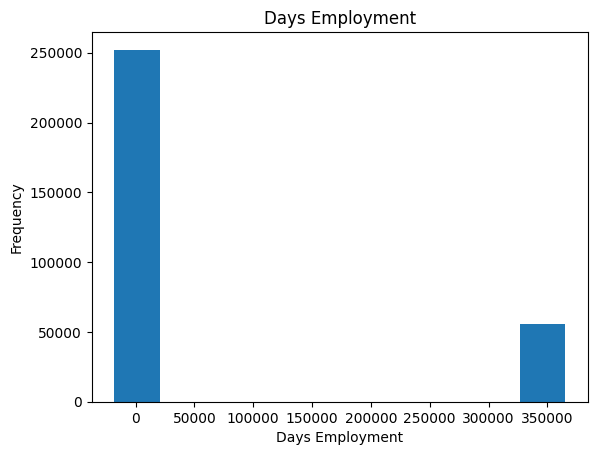

In [49]:
app_train['days_employed'].plot.hist(title = 'Days Employment');
plt.xlabel('Days Employment')

In [50]:
anom = app_train[app_train['days_employed'] == 365243]
non_anom = app_train[app_train['days_employed'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['target'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['target'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [51]:
app_test.describe()

,sk_id_curr,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [52]:
bureau.describe()

,sk_id_curr,sk_id_bureau,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,amt_annuity
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [53]:
bureau_balance.describe()

,sk_id_bureau,months_balance
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [54]:
credit_card_balance.describe()

,sk_id_prev,sk_id_curr,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,...,amt_receivable_principal,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,sk_dpd,sk_dpd_def
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [55]:
installments_payments.describe()

,sk_id_prev,sk_id_curr,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [56]:
previous_application.describe()

,sk_id_prev,sk_id_curr,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,hour_appr_process_start,nflag_last_appl_in_day,rate_down_payment,...,rate_interest_privileged,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [57]:
POS_CASH_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


*************************************************************************************************

# Feature Visualizations

In [58]:
import matplotlib.cm as cm

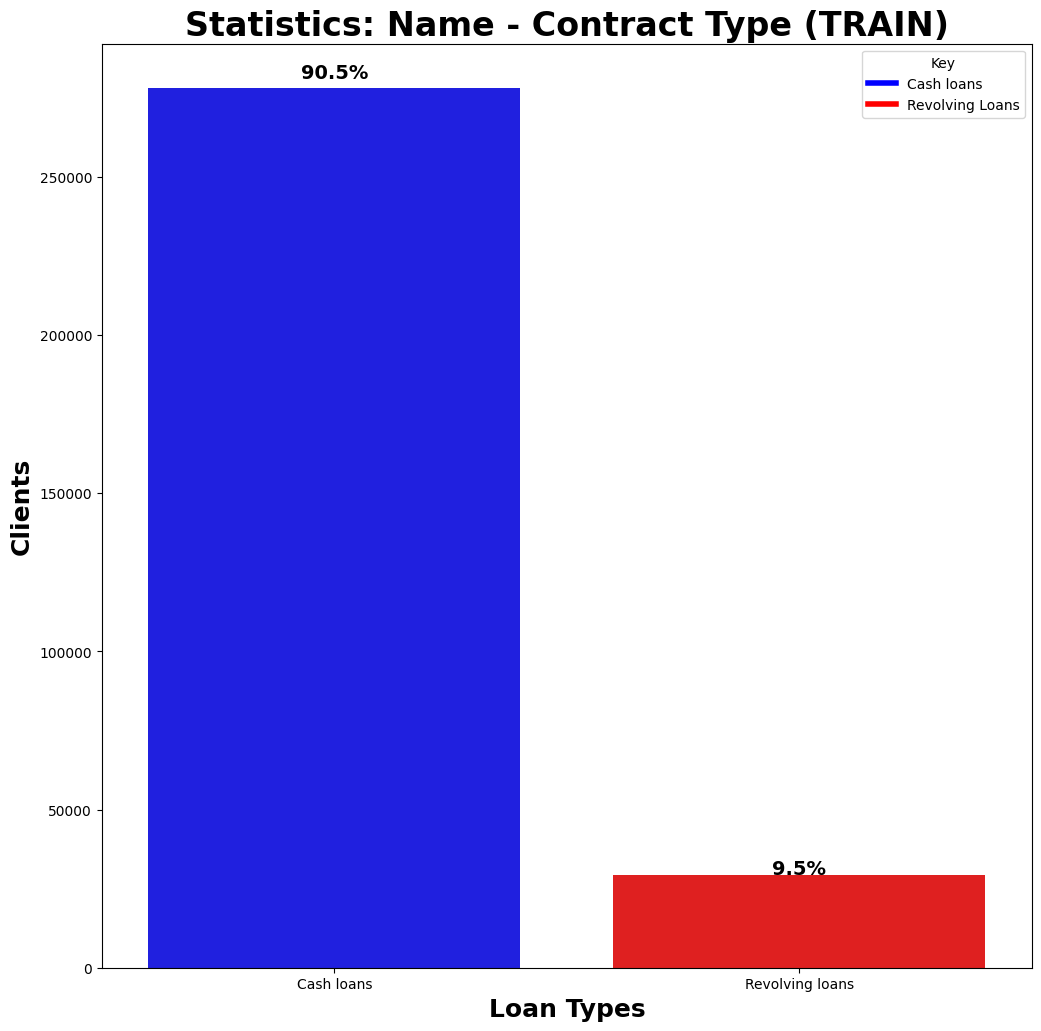

In [59]:
custom_palette = {"Cash loans": 'blue', "Revolving loans": 'red'}
app_train['name_contract_type'] = app_train['name_contract_type'].replace({0: "Cash loans", 1: "Revolving loans"})
total_count = len(app_train)

value_counts = app_train['name_contract_type'].value_counts()
percentages = (value_counts / total_count) * 100

fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.countplot(x='name_contract_type', data=app_train, hue='name_contract_type', palette=custom_palette, legend=False)

for p in ax.patches:
    height = p.get_height()
    percentage = f"{(height / total_count) * 100:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2, height + height * 0.01 + 50,  
            percentage, ha='center', fontsize=14, weight="bold")

plt.xlabel("Loan Types", fontsize=18, weight="bold")
plt.ylabel("Clients", fontsize=18, weight="bold")
plt.title("Statistics: Name - Contract Type (TRAIN)", fontsize=24, weight="bold")
plt.xticks([0, 1], ["Cash loans", "Revolving loans"])

handles = [plt.Line2D([0], [0], color=custom_palette["Cash loans"], lw=4, label='Cash loans'),
           plt.Line2D([0], [0], color=custom_palette["Revolving loans"], lw=4, label='Revolving Loans')]

plt.legend(handles=handles, title='Key')
plt.show()

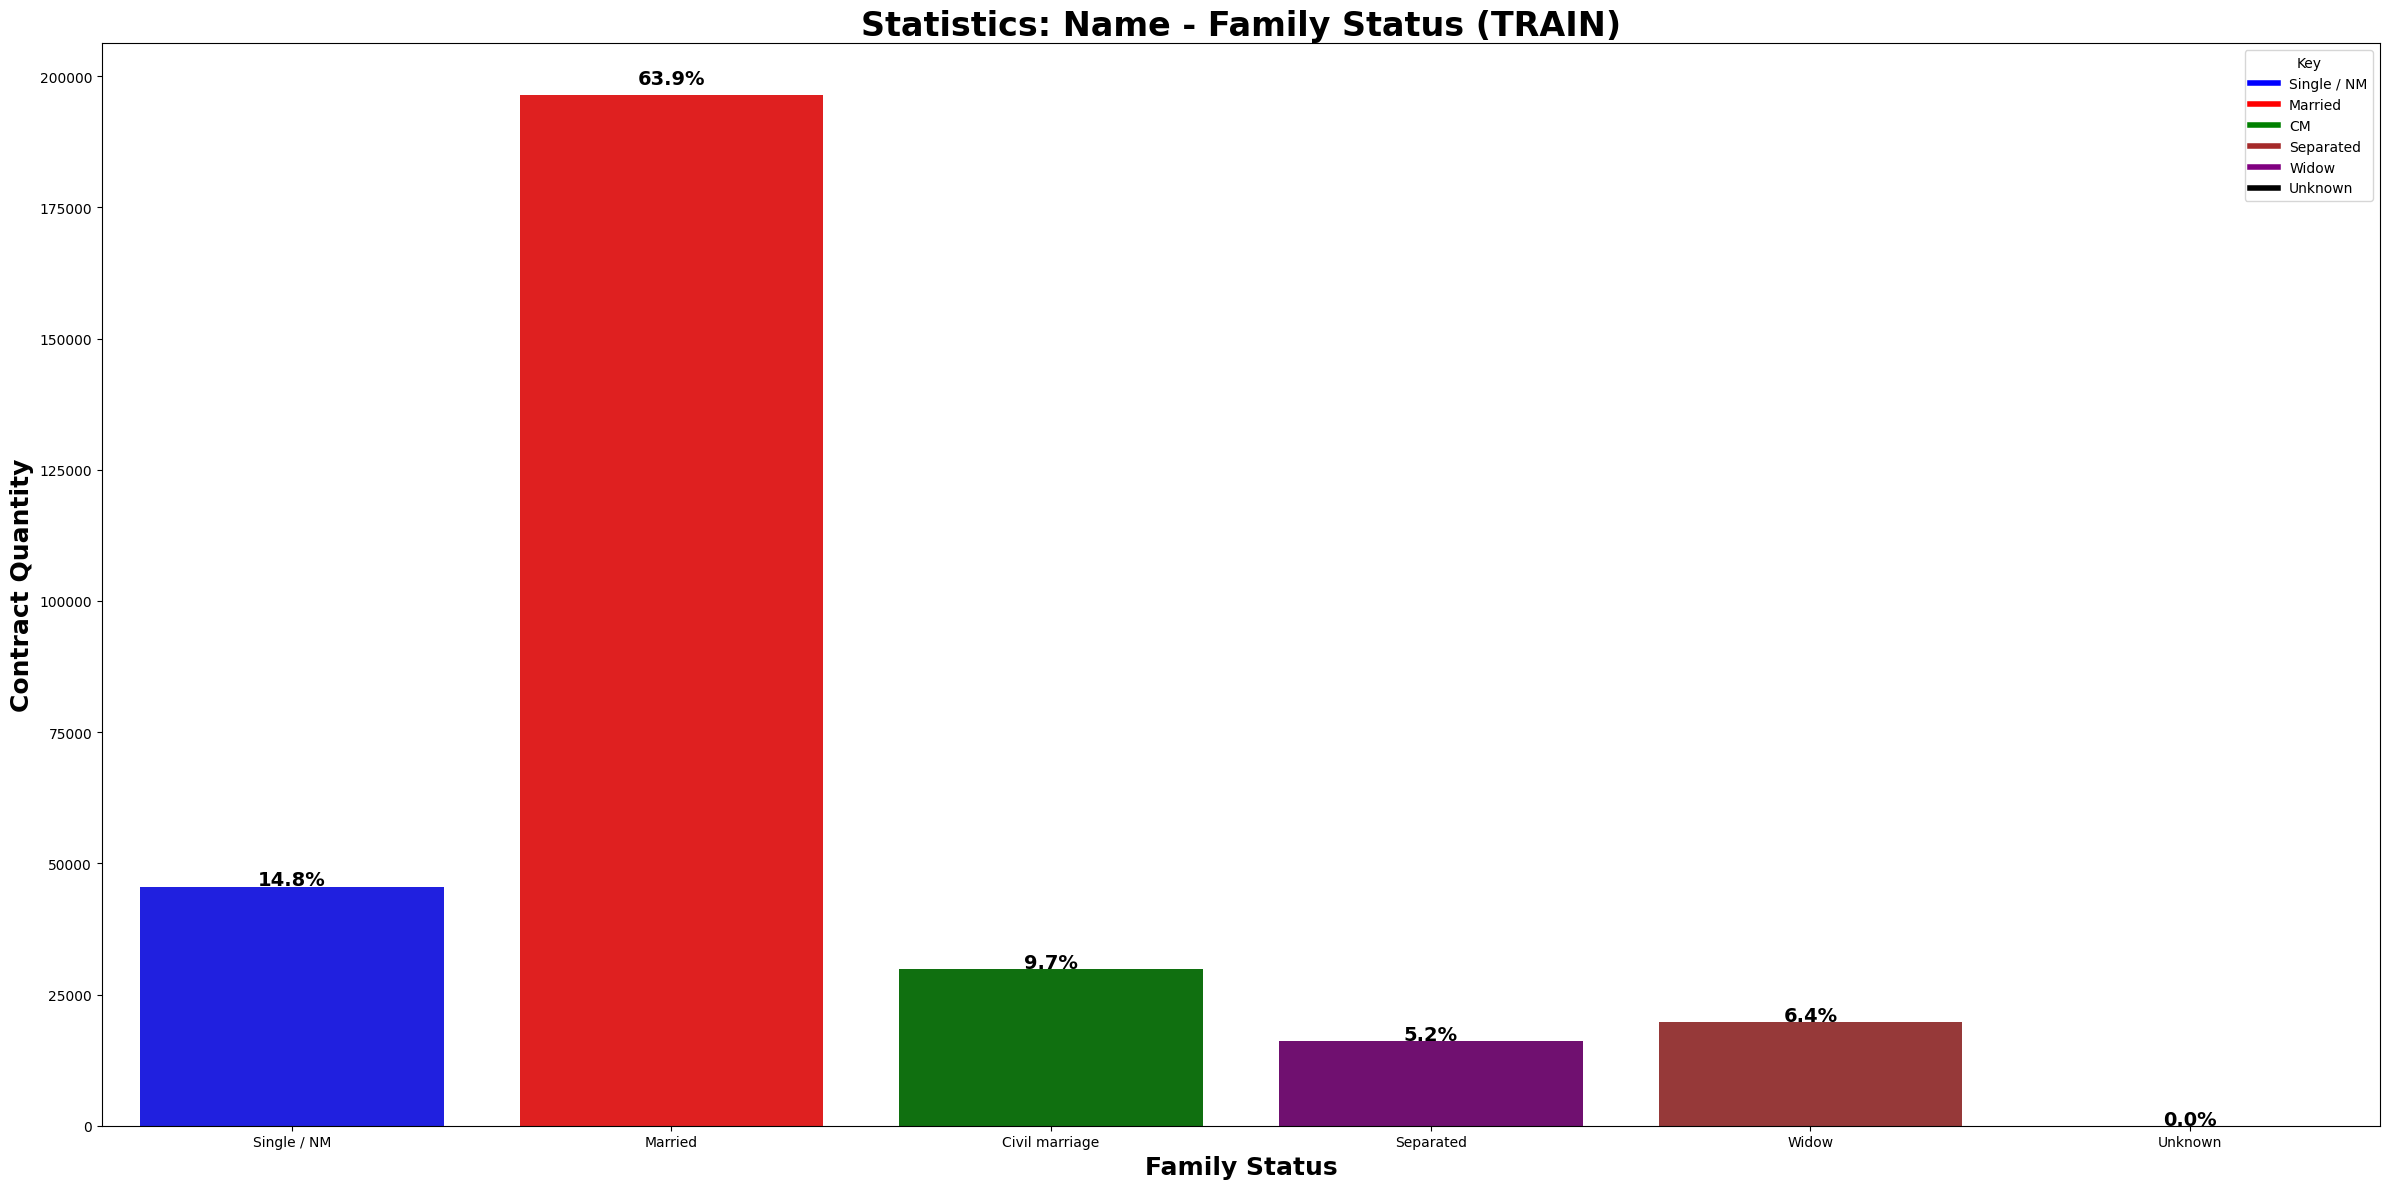

In [60]:
custom_palette = {"Single / not married": 'blue', "Married": 'red', "Civil marriage": 'green', "Separated": 'brown', "Widow": 'purple', "Unknown": 'black'}
app_train['name_family_status'] = app_train['name_family_status'].replace({0: "Single / not married", 1: "Married", 2: "Civil marriage", 3: "Separated", 4: "Widow",  5: "Unknown"})
total_count = len(app_train)

value_counts = app_train['name_family_status'].value_counts()
percentages = (value_counts / total_count) * 100

fig, ax = plt.subplots(figsize=(24, 12))
ax = sns.countplot(x='name_family_status', data=app_train, hue='name_family_status', palette=custom_palette, legend=False)

for p in ax.patches:
    height = p.get_height()
    percentage = f"{(height / total_count) * 100:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2, height + height * 0.01 + 50,  
            percentage, ha='center', fontsize=14, weight="bold")

plt.xlabel("Family Status", fontsize=18, weight="bold")
plt.ylabel("Contract Quantity", fontsize=18, weight="bold")
plt.title("Statistics: Name - Family Status (TRAIN)", fontsize=24, weight="bold")

tick_positions = [0, 1, 2, 3, 4, 5]
tick_labels = ["Single / NM", "Married", "Civil marriage", "Separated", "Widow", "Unknown"]
    
plt.xticks(tick_positions, tick_labels)

handles = [
    plt.Line2D([0], [0], color=custom_palette["Single / not married"], lw=4, label='Single / NM'),
    plt.Line2D([0], [0], color=custom_palette["Married"], lw=4, label='Married'),
    plt.Line2D([0], [0], color=custom_palette["Civil marriage"], lw=4, label='CM'),
    plt.Line2D([0], [0], color=custom_palette["Separated"], lw=4, label='Separated'),
    plt.Line2D([0], [0], color=custom_palette["Widow"], lw=4, label='Widow'),
    plt.Line2D([0], [0], color=custom_palette["Unknown"], lw=4, label='Unknown'),
    ]

plt.legend(handles=handles, title='Key')
plt.tight_layout()
plt.show()

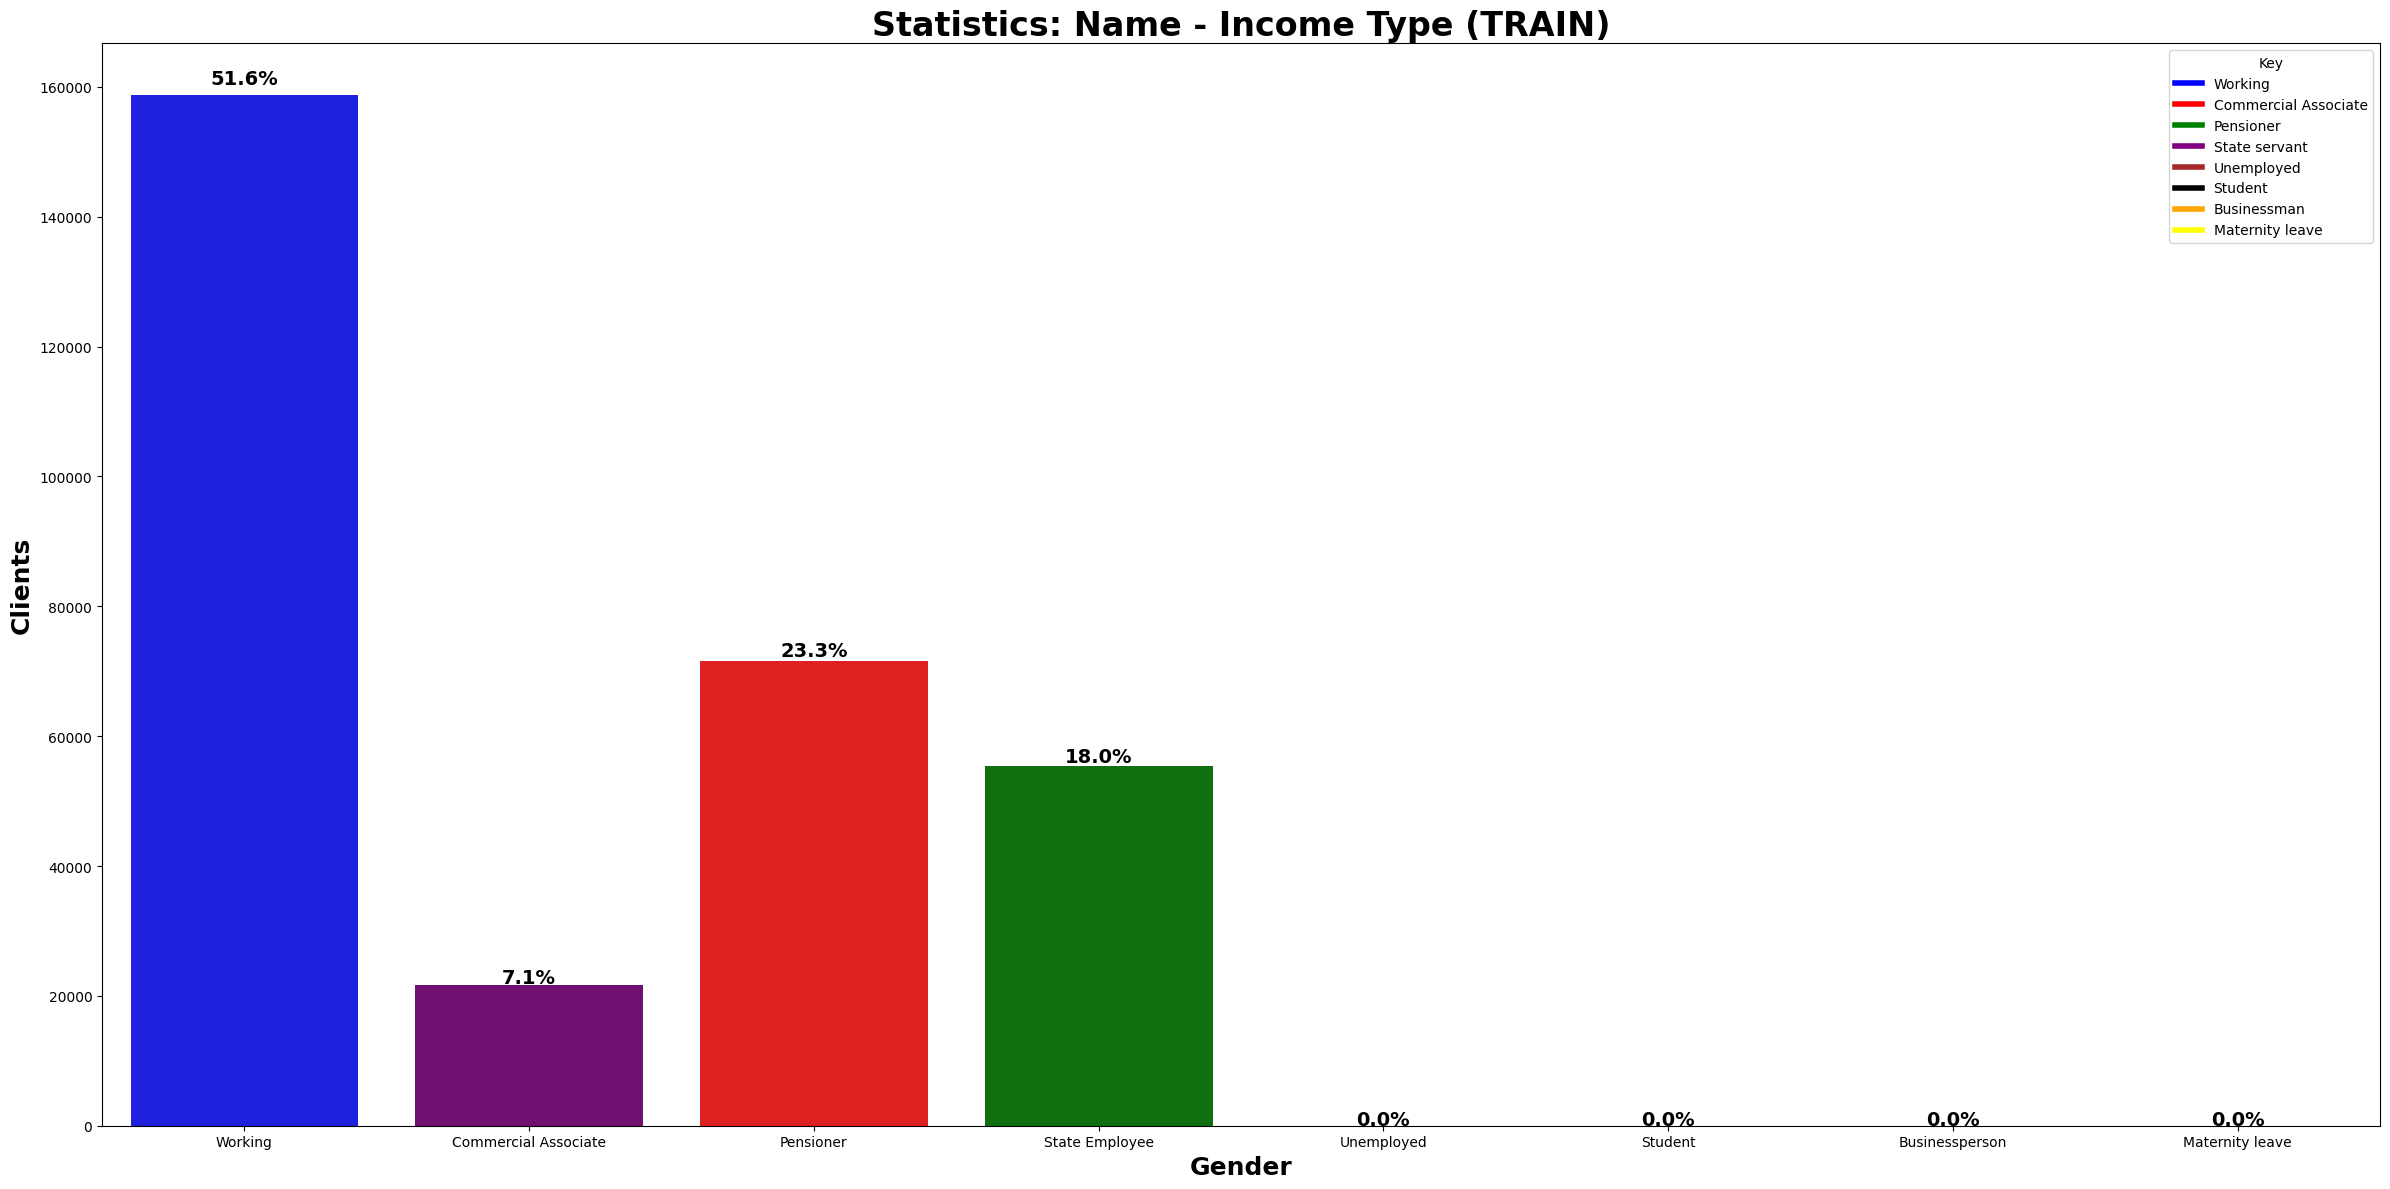

In [61]:
custom_palette = {"Working": 'blue', "Commercial associate": 'red', "Pensioner": 'green', "State servant": 'purple', "Unemployed": 'brown', "Student": 'black', "Businessman": 'orange', "Maternity leave": 'yellow'}
app_train['name_income_type'] = app_train['name_income_type'].replace({0: "Working", 1: "Commercial Associate", 2: "Pensioner", 3: "State Servant", 4: "Unemployed", 5: "Student", 6: "Businessman", 7: "Maternity leave"})
total_count = len(app_train)

value_counts = app_train['name_income_type'].value_counts()
percentages = (value_counts / total_count) * 100

fig, ax = plt.subplots(figsize=(24, 12))
ax = sns.countplot(x='name_income_type', data=app_train, hue='name_income_type', palette=custom_palette, legend=False)

for p in ax.patches:
    height = p.get_height()
    percentage = f"{(height / total_count) * 100:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2, height + height * 0.01 + 50,  
            percentage, ha='center', fontsize=14, weight="bold")

plt.xlabel("Gender", fontsize=18, weight="bold")
plt.ylabel("Clients", fontsize=18, weight="bold")
plt.title("Statistics: Name - Income Type (TRAIN)", fontsize=24, weight="bold")

tick_positions = [0, 1, 2, 3, 4, 5, 6, 7]
tick_labels = ["Working", "Commercial Associate", "Pensioner", "State Employee", "Unemployed", "Student", "Businessperson", "Maternity leave"]
plt.xticks(tick_positions, tick_labels)

handles = [
    plt.Line2D([0], [0], color=custom_palette["Working"], lw=4, label='Working'),
    plt.Line2D([0], [0], color=custom_palette["Commercial associate"], lw=4, label='Commercial Associate'),
    plt.Line2D([0], [0], color=custom_palette["Pensioner"], lw=4, label='Pensioner'),
    plt.Line2D([0], [0], color=custom_palette["State servant"], lw=4, label='State servant'),
    plt.Line2D([0], [0], color=custom_palette["Unemployed"], lw=4, label='Unemployed'),
    plt.Line2D([0], [0], color=custom_palette["Student"], lw=4, label='Student'),
    plt.Line2D([0], [0], color=custom_palette["Businessman"], lw=4, label='Businessman'),
    plt.Line2D([0], [0], color=custom_palette["Maternity leave"], lw=4, label='Maternity leave'),
    ]

plt.legend(handles=handles, title='Key')
plt.tight_layout()
plt.show()

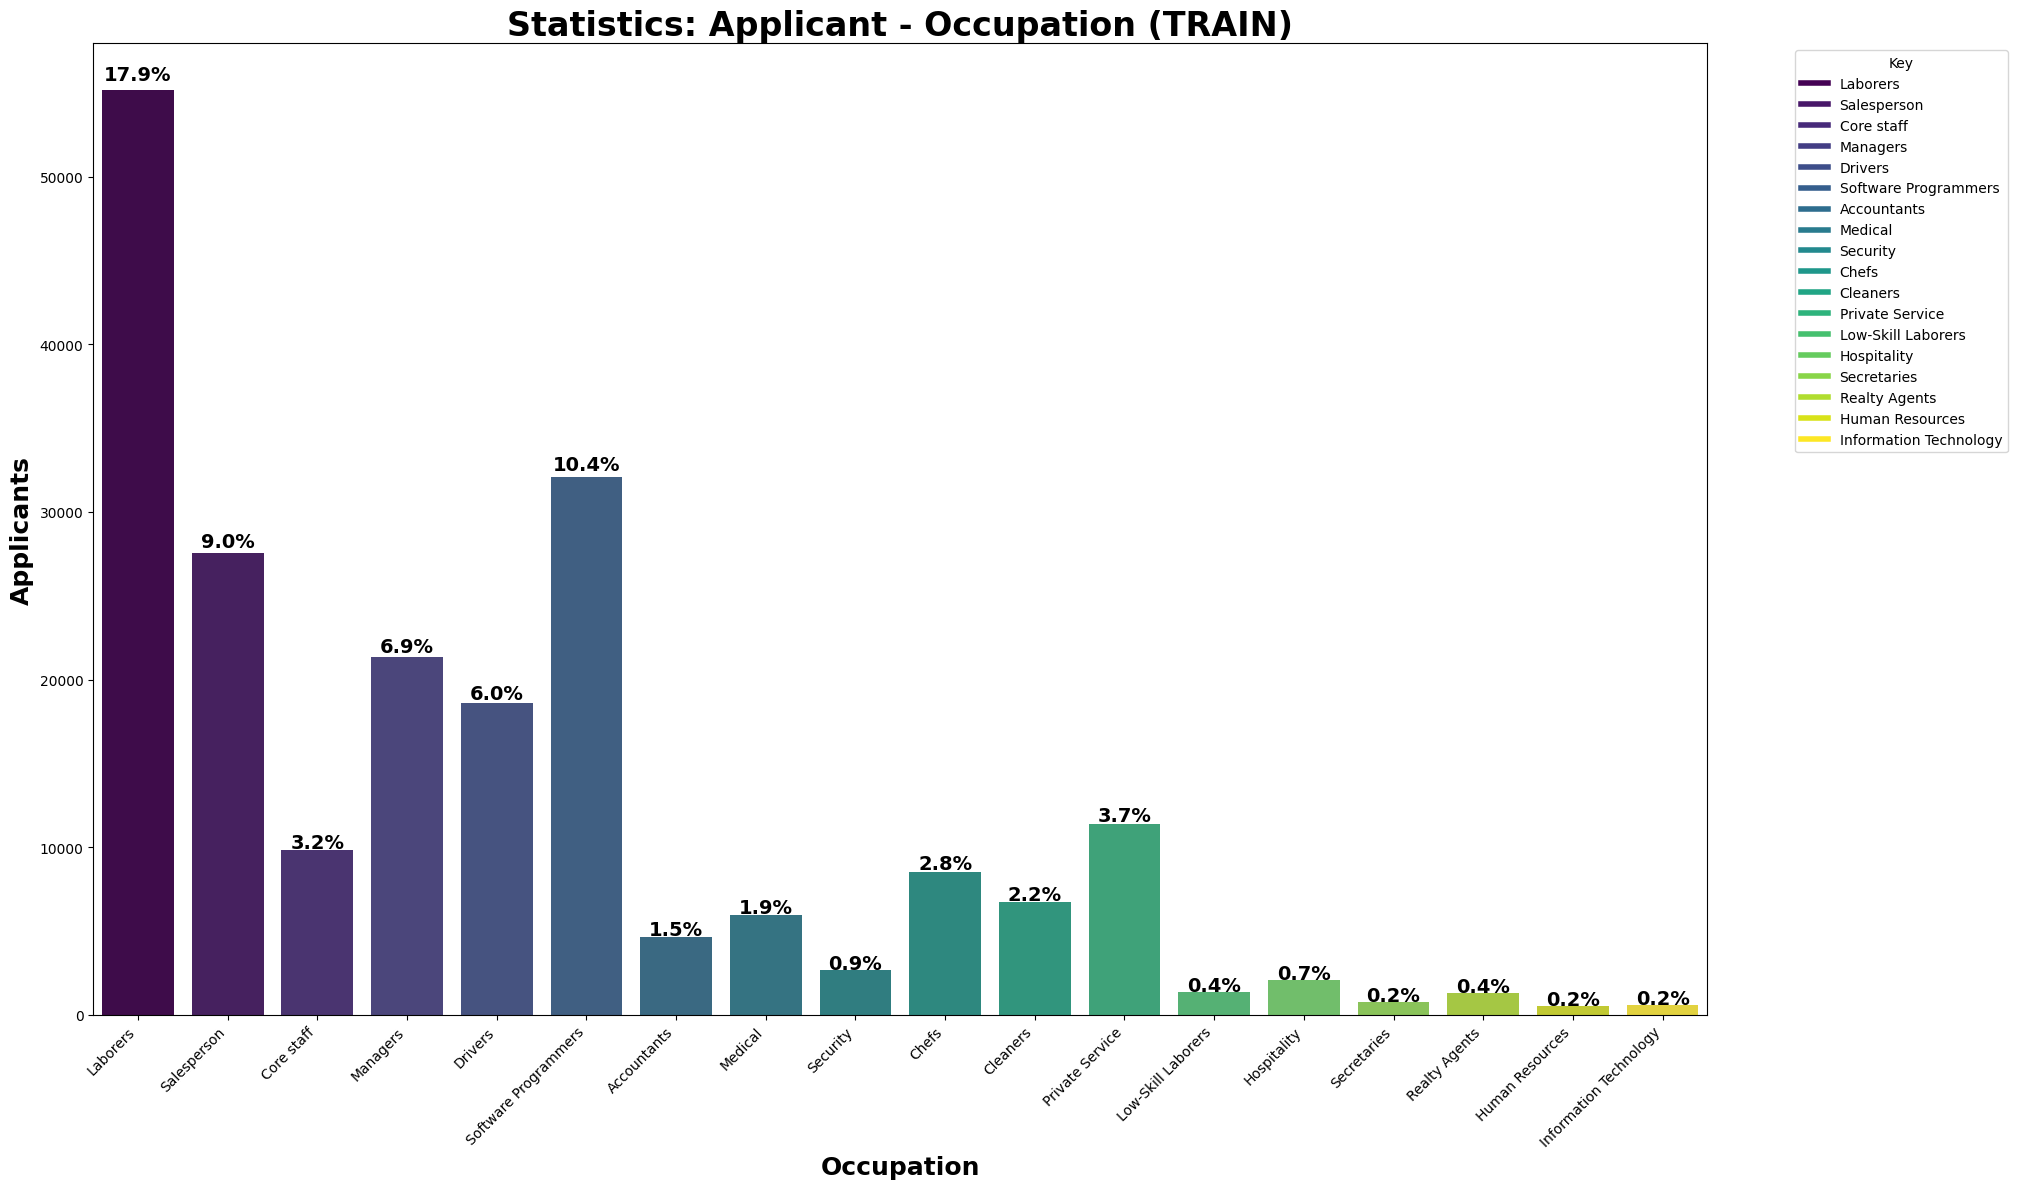

In [62]:
app_train['occupation_type'] = app_train['occupation_type'].replace({0: "Laborers", 1: "Sales staff", 2: "Core staff", 3: "Managers", 4: "Drivers", 5: "High Skill Tech Staff", 6: "Accountants", 7: "Medicine staff", 8: "Security staff", 9: "Cooking staff", 10: "Cleaning staff", 11: "Private service staff", 12: "Low-skill Laborers", 13: "Waiters/barmen staff", 14: "Secretaries", 15: "Realty agents", 16: "HR Staff", 17: "IT Staff"})

total_count = len(app_train)
value_counts = app_train['occupation_type'].value_counts()
percentages = (value_counts / total_count) * 100

fig, ax = plt.subplots(figsize=(24, 12))
num_categories = len(value_counts)
cmap = cm.viridis(np.linspace(0, 1, num_categories))

ax = sns.countplot(x='occupation_type', data=app_train, hue='occupation_type', palette=cmap, legend=False)

for p in ax.patches:
    height = p.get_height()
    percentage = f"{(height / total_count) * 100:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2, height + height * 0.01 + 50,
            percentage, ha='center', fontsize=14, weight="bold")

plt.xlabel("Occupation", fontsize=18, weight="bold")
plt.ylabel("Applicants", fontsize=18, weight="bold")
plt.title("Statistics: Applicant - Occupation (TRAIN)", fontsize=24, weight="bold")

tick_labels = ["Laborers", "Salesperson", "Core staff", "Managers", "Drivers", "Software Programmers", "Accountants", "Medical", "Security", "Chefs", "Cleaners", "Private Service", "Low-Skill Laborers", "Hospitality", "Secretaries", "Realty Agents", "Human Resources", "Information Technology"]
tick_positions = np.arange(len(tick_labels))

plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

handles = []
for i, label in enumerate(tick_labels):
    color = cmap[i]
    handles.append(plt.Line2D([0], [0], color=color, lw=4, label=label))

plt.legend(handles=handles, title='Key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

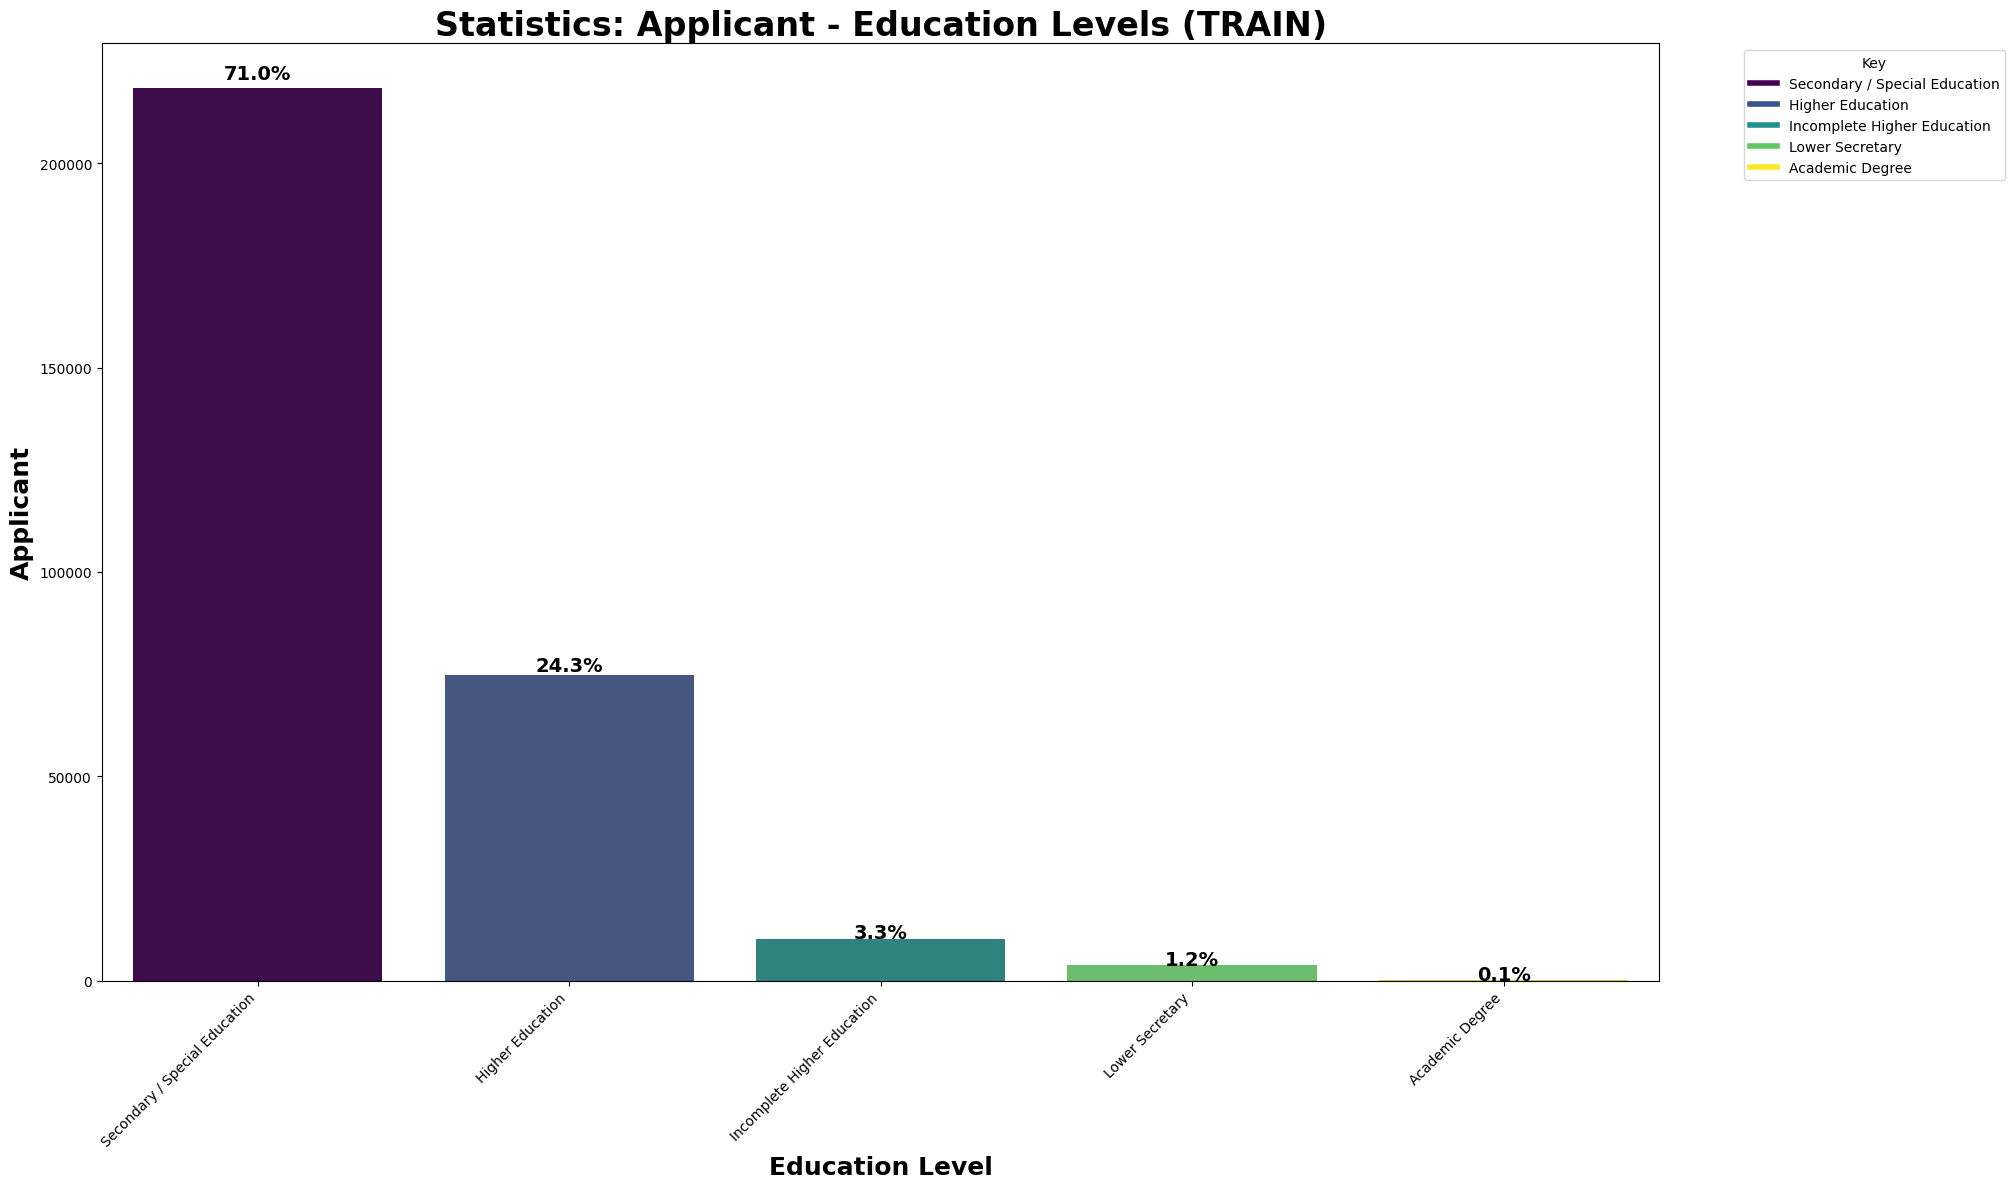

In [63]:
app_train['name_education_type'] = app_train['name_education_type'].replace({0: "Secondary / secondary special", 1: "Higher education", 2: "Incomplete Higher", 3: "Lower secretary", 4: "Academic degree"})

total_count = len(app_train)
value_counts = app_train['name_education_type'].value_counts()
percentages = (value_counts / total_count) * 100

fig, ax = plt.subplots(figsize=(24, 12))
num_categories = len(value_counts)
cmap = cm.viridis(np.linspace(0, 1, num_categories))

ax = sns.countplot(x='name_education_type', data=app_train, hue='name_education_type', palette=cmap, legend=False)

for p in ax.patches:
    height = p.get_height()
    percentage = f"{(height / total_count) * 100:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2, height + height * 0.01 + 50,
            percentage, ha='center', fontsize=14, weight="bold")

plt.xlabel("Education Level", fontsize=18, weight="bold")
plt.ylabel("Applicant", fontsize=18, weight="bold")
plt.title("Statistics: Applicant - Education Levels (TRAIN)", fontsize=24, weight="bold")

tick_labels = ["Secondary / Special Education", "Higher Education", "Incomplete Higher Education", "Lower Secretary", "Academic Degree"]
tick_positions = np.arange(len(tick_labels))

plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

handles = []
for i, label in enumerate(tick_labels):
    color = cmap[i]
    handles.append(plt.Line2D([0], [0], color=color, lw=4, label=label))

plt.legend(handles=handles, title='Key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# Visual Distributions

In [64]:
app_train['days_birth'] = abs(app_train['days_birth'])

age_data = app_train[['target', 'days_birth']]
age_data['years_birth'] = abs(age_data['days_birth']) / 365

age_data['years_binned'] = pd.cut(age_data['years_birth'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,target,days_birth,years_birth,years_binned
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [65]:
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(app_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

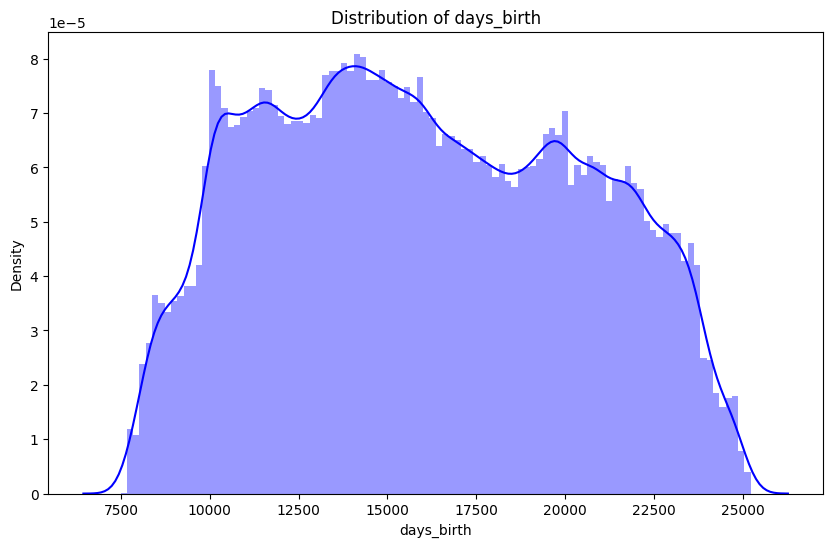

In [66]:
plot_distribution('days_birth', 'blue')

In [67]:
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(app_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

Ages represented in Absolute values

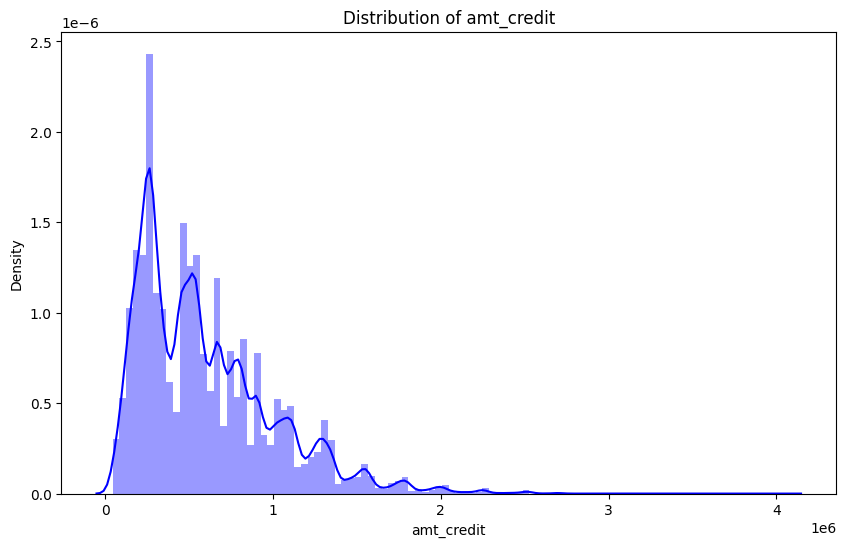

In [68]:
plot_distribution('amt_credit','blue')

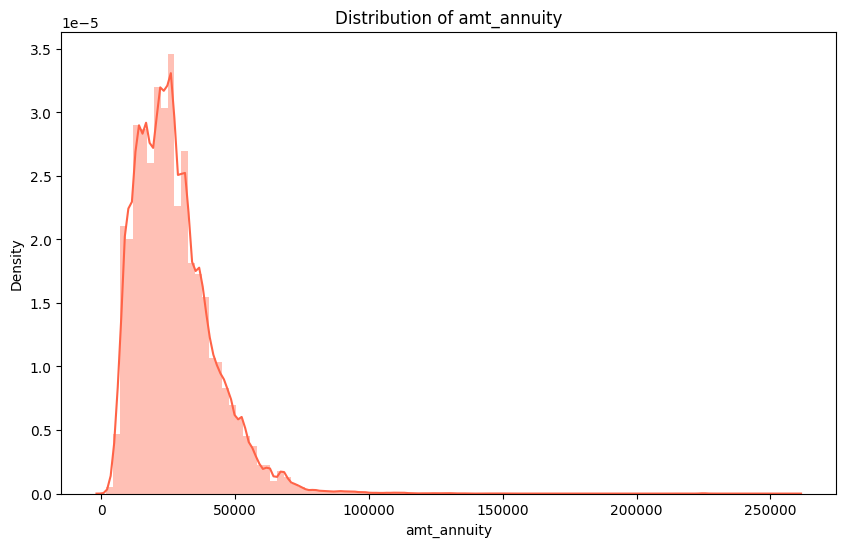

In [69]:
plot_distribution('amt_annuity','tomato')

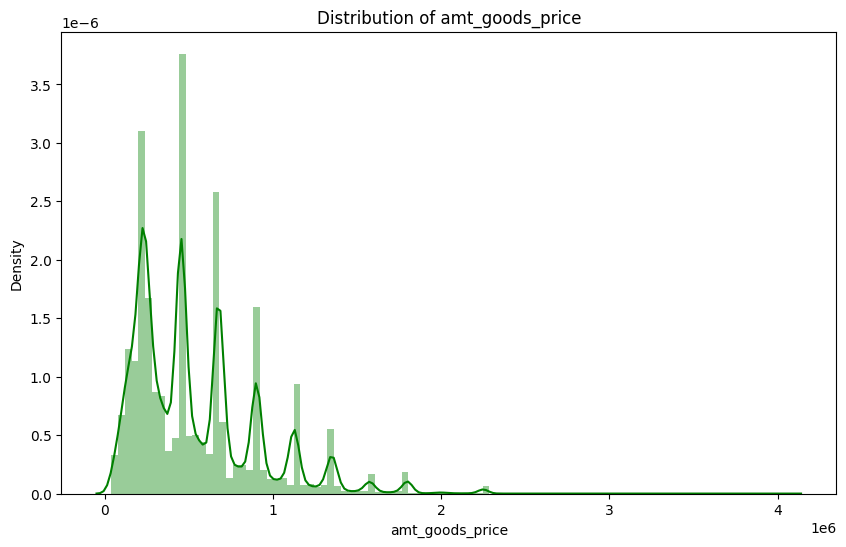

In [70]:
plot_distribution('amt_goods_price','green')

In [74]:
def plot_b_distribution(feature,color):
    plt.figure(figsize=(10,6))     
    plt.title("Distribution of %s" % feature)
    sns.distplot(bureau[feature].abs().dropna(),color=color, kde=True, bins=100)
    plt.show()

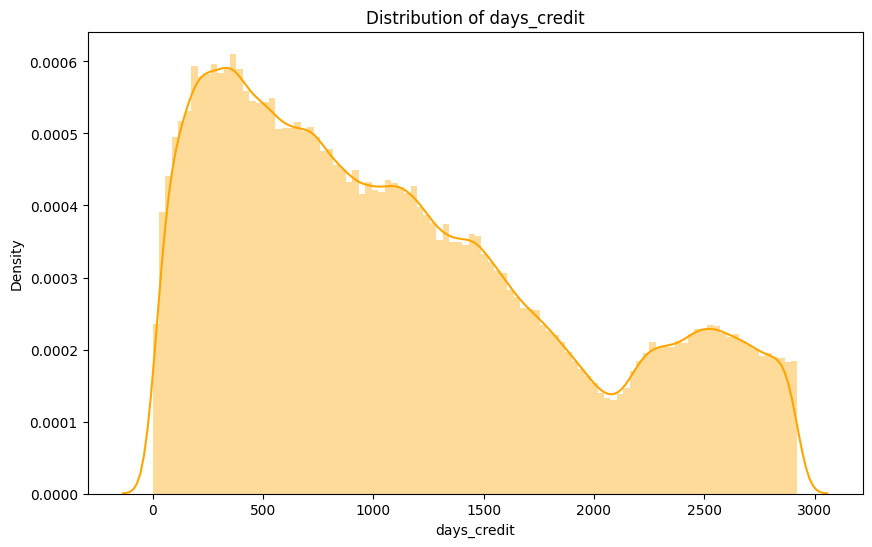

In [75]:
plot_b_distribution('days_credit','orange')

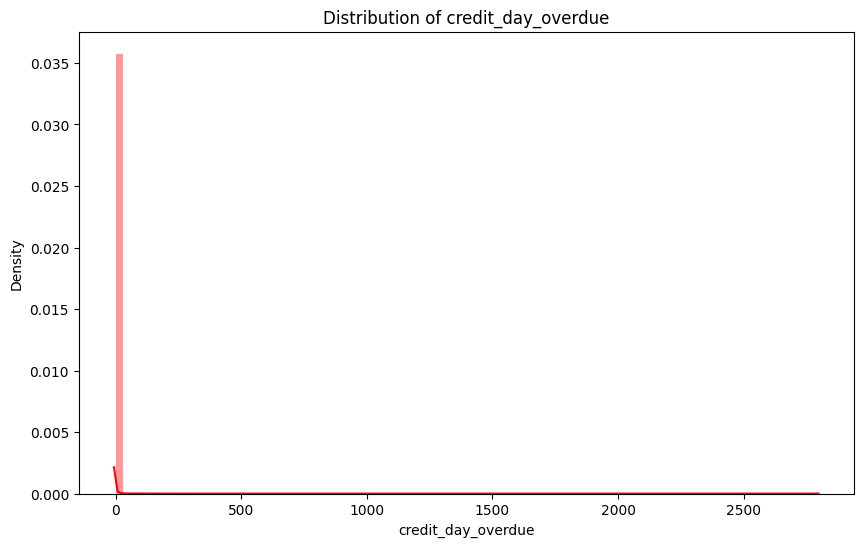

In [76]:
plot_b_distribution('credit_day_overdue','red')

**Outliers**

In [77]:
def is_outlier(points):
    
    if isinstance(points, pd.Series):
      points_values = points.values.reshape(-1, 1)
      q1 = np.percentile(points_values, 25)
      q3 = np.percentile(points_values, 75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      outliers = (points_values < lower_bound) | (points_values > upper_bound)
      return pd.Series(outliers.ravel(), index=points.index)
    elif len(points.shape) == 1:
      points_values = points.reshape(-1, 1)
      q1 = np.percentile(points_values, 25)
      q3 = np.percentile(points_values, 75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      outliers = (points_values < lower_bound) | (points_values > upper_bound)
      return outliers.ravel()
    else:
      
      q1 = np.percentile(points, 25, axis = 0)
      q3 = np.percentile(points, 75, axis = 0)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      outliers = (points < lower_bound) | (points > upper_bound)
      return outliers

In [78]:
def plot_b_o_distribution(feature, color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    x = bureau[feature].dropna()
    outliers = is_outlier(x)
    filtered = x[~outliers]
    sns.distplot(filtered,color=color, kde=True,bins=100)
    plt.show()

bureau = pd.DataFrame({'AMT_CREDIT_SUM': [1000, 2000, 3000, 4000, 5000, 1000000]})

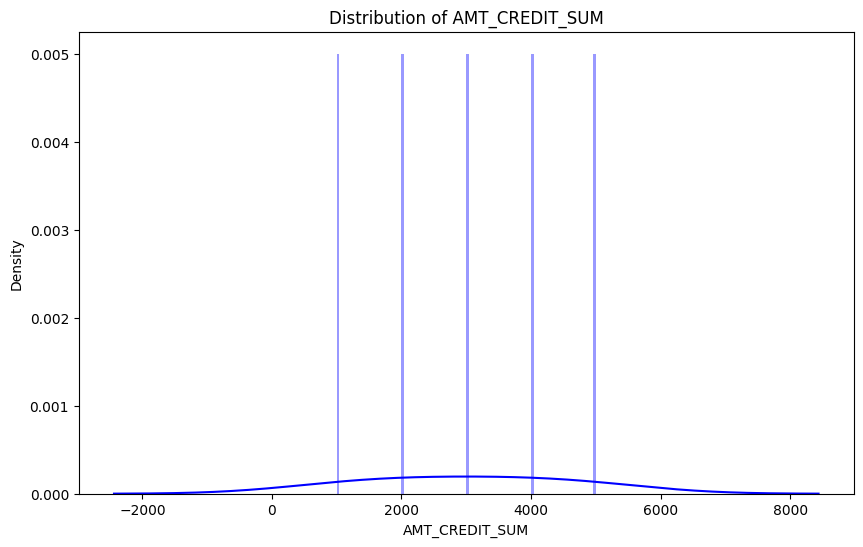

In [79]:
plot_b_o_distribution('AMT_CREDIT_SUM', 'blue')

In [80]:
def plot_b_distribution_comp(var, nrow=2):
    i = 0
    try:
        t1 = bureau.loc[bureau['target'] != 0]
        t0 = bureau.loc[bureau['target'] == 0]

        sns.set_style('whitegrid')
        plt.figure(figsize=(20, 6*len(var)//nrow))
        for feature in var:
            i += 1
            plt.subplot(len(var)//nrow + 1, nrow, i)
            sns.distplot(t1[feature].dropna(), color='red', label=1)
            sns.distplot(t0[feature].dropna(), color='blue', label=0)
            plt.title(feature)
            plt.legend()
        plt.show()
    except KeyError as e:
        print(f"Error: Column 'target' not found. Available columns are:")
        print(bureau.columns)
        print(f"Original error: {e}")
        return


bureau = pd.DataFrame({'days_credit': [1000, 2000, 3000], 'target': [0, 1, 0], 'amt_credit_sum':[1,2,3], 'amt_credit_sum_limit':[4,5,6]})

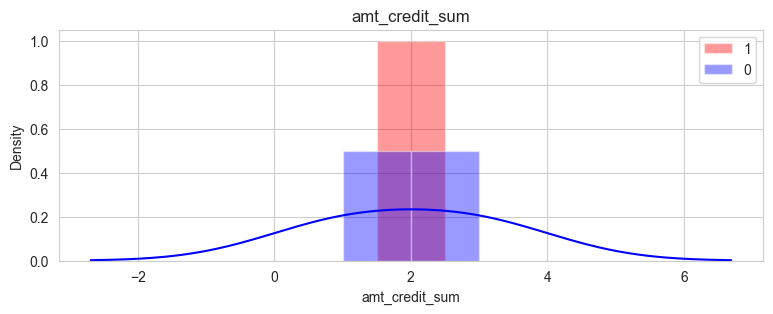

In [81]:
var = ['amt_credit_sum']
plot_b_distribution_comp(var, nrow=2)

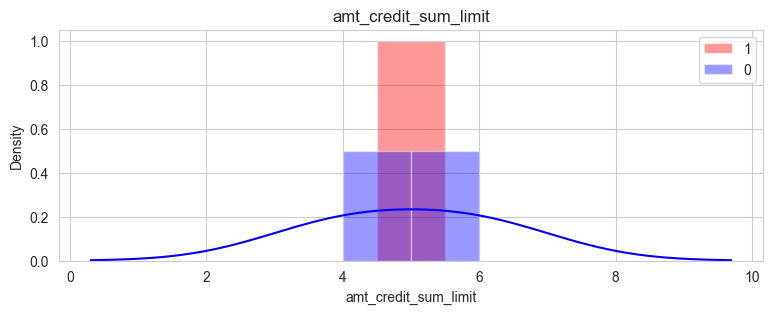

In [82]:
var = ['amt_credit_sum_limit']
plot_b_distribution_comp(var, nrow=2)

*************************************************************************************************************************************************************************************************************************************

# Categoricals

*************************************************************************************************

Quantity Differences in columns between train & test datasets:

a. 'code_gender'

b. 'name_income_type'

c. 'name_family_status'



In [83]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_contract_type             2
code_gender                    3
flag_own_car                   2
flag_own_realty                2
name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
fondkapremont_mode             4
housetype_mode                 3
wallsmaterial_mode             7
emergencystate_mode            2
dtype: int64

In [84]:
app_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_contract_type             2
code_gender                    2
flag_own_car                   2
flag_own_realty                2
name_type_suite                7
name_income_type               7
name_education_type            5
name_family_status             5
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
fondkapremont_mode             4
housetype_mode                 3
wallsmaterial_mode             7
emergencystate_mode            2
dtype: int64

In [85]:
bureau.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [86]:
bureau_balance.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

status    8
dtype: int64

In [87]:
credit_card_balance.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_contract_status    7
dtype: int64

In [88]:
previous_application.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_contract_type              4
weekday_appr_process_start      7
flag_last_appl_per_contract     2
name_cash_loan_purpose         25
name_contract_status            4
name_payment_type               4
code_reject_reason              9
name_type_suite                 7
name_client_type                4
name_goods_category            28
name_portfolio                  5
name_product_type               3
channel_type                    8
name_seller_industry           11
name_yield_group                5
product_combination            17
dtype: int64

In [89]:
POS_CASH_balance.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_STATUS    9
dtype: int64

In [90]:
installments_payments.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

*************************************************************************************************************************************************************************************************************************************

**Differences**

Listing: app_train column values

Column Differences in numbers between 'train' & 'test' datasheets: 

*code gender* 

*name_income_type* 

*name_family_status*

In [91]:
app_train['name_contract_type'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [92]:
app_train['code_gender'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [93]:
app_train['flag_own_car'].unique()

array(['N', 'Y'], dtype=object)

In [94]:
app_train['flag_own_realty'].unique()

array(['Y', 'N'], dtype=object)

In [95]:
app_train['name_type_suite'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [96]:
app_train['name_education_type'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [97]:
app_train['name_housing_type'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [98]:
app_train['occupation_type'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [99]:
app_train['weekday_appr_process_start'].unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [100]:
app_train['organization_type'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [101]:
app_train['fondkapremont_mode'].unique()

array(['reg oper account', nan, 'org spec account',
       'reg oper spec account', 'not specified'], dtype=object)

In [102]:
app_train['wallsmaterial_mode'].unique()

array(['Stone, brick', 'Block', nan, 'Panel', 'Mixed', 'Wooden', 'Others',
       'Monolithic'], dtype=object)

In [103]:
app_train['emergencystate_mode'].unique()

array(['No', nan, 'Yes'], dtype=object)

*************************************************************************************************

# Nulls

*************************************************************************************************

Running test to see how many nulls exist in each dataframe (and their columns)

In [104]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [105]:
missing_data(app_train).head(10)

,Total,Percent
commonarea_medi,214865,69.872297
commonarea_avg,214865,69.872297
commonarea_mode,214865,69.872297
nonlivingapartments_mode,213514,69.432963
nonlivingapartments_avg,213514,69.432963
nonlivingapartments_medi,213514,69.432963
fondkapremont_mode,210295,68.386172
livingapartments_mode,210199,68.354953
livingapartments_avg,210199,68.354953
livingapartments_medi,210199,68.354953


In [106]:
missing_data(app_test).head(10)

,Total,Percent
commonarea_avg,33495,68.716150
commonarea_mode,33495,68.716150
commonarea_medi,33495,68.716150
nonlivingapartments_avg,33347,68.412523
nonlivingapartments_mode,33347,68.412523
nonlivingapartments_medi,33347,68.412523
fondkapremont_mode,32797,67.284179
livingapartments_avg,32780,67.249302
livingapartments_mode,32780,67.249302
livingapartments_medi,32780,67.249302


In [107]:
missing_data(bureau)

,Total,Percent
days_credit,0,0.0
target,0,0.0
amt_credit_sum,0,0.0
amt_credit_sum_limit,0,0.0


In [108]:
missing_data(bureau_balance)

,Total,Percent
sk_id_bureau,0,0.0
months_balance,0,0.0
status,0,0.0


In [109]:
missing_data(credit_card_balance)

,Total,Percent
amt_payment_current,767988,19.998063
amt_drawings_atm_current,749816,19.524872
cnt_drawings_pos_current,749816,19.524872
amt_drawings_other_current,749816,19.524872
amt_drawings_pos_current,749816,19.524872
cnt_drawings_other_current,749816,19.524872
cnt_drawings_atm_current,749816,19.524872
cnt_instalment_mature_cum,305236,7.948208
amt_inst_min_regularity,305236,7.948208
sk_id_prev,0,0.000000


In [110]:
missing_data(installments_payments)

,Total,Percent
days_entry_payment,2905,0.021352
amt_payment,2905,0.021352
sk_id_prev,0,0.000000
sk_id_curr,0,0.000000
num_instalment_version,0,0.000000
num_instalment_number,0,0.000000
days_instalment,0,0.000000
amt_instalment,0,0.000000


In [111]:
missing_data(previous_application).head(20)

,Total,Percent
rate_interest_privileged,1664263,99.643698
rate_interest_primary,1664263,99.643698
amt_down_payment,895844,53.636480
rate_down_payment,895844,53.636480
name_type_suite,820405,49.119754
nflag_insured_on_approval,673065,40.298129
days_termination,673065,40.298129
days_last_due,673065,40.298129
days_last_due_1st_version,673065,40.298129
days_first_due,673065,40.298129


In [112]:
missing_data(POS_CASH_balance)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
MONTHS_BALANCE,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000


*************************************************************************************************************************************************************************************************************************************

**Filling All Nulls**

In [113]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

*Filling Train nulls (Numeric & Categorical)*

In [114]:
numeric_cols = app_train.select_dtypes(include=['number']).columns
app_train[numeric_cols] = app_train[numeric_cols].fillna(0)

In [115]:
categorical_cols = app_train.select_dtypes(include=['object']).columns[app_train.select_dtypes(include=['object']).isnull().any()]
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(app_train[categorical_cols])
app_train[categorical_cols] = imputer.transform(app_train[categorical_cols])

*Filling Test nulls (Numeric & Categorical)*

In [116]:
numeric_cols = app_test.select_dtypes(include=['number']).columns
app_test[numeric_cols] = app_test[numeric_cols].fillna(0)

In [117]:
categorical_cols = app_test.select_dtypes(include=['object']).columns[app_test.select_dtypes(include=['object']).isnull().any()]
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(app_test[categorical_cols])
app_test[categorical_cols] = imputer.transform(app_test[categorical_cols])

*Filling Bureau nulls (numeric)*

In [118]:
numeric_cols = bureau.select_dtypes(include=['number']).columns
bureau[numeric_cols] = bureau[numeric_cols].fillna(0)

*Filling Bureau Balance nulls (numeric)*

In [119]:
numeric_cols = bureau_balance.select_dtypes(include=['number']).columns
bureau_balance[numeric_cols] = bureau_balance[numeric_cols].fillna(0)

*Filling Credit Card Balance nulls (numeric)*

In [120]:
numeric_cols = credit_card_balance.select_dtypes(include=['number']).columns
credit_card_balance[numeric_cols] = credit_card_balance[numeric_cols].fillna(0)

*Filling Installment Payment nulls (Numeric)*

In [121]:
numeric_cols = installments_payments.select_dtypes(include=['number']).columns
installments_payments[numeric_cols] = installments_payments[numeric_cols].fillna(0)

*Filling Previous Applications nulls (Numeric & Categorical)*

In [122]:
numeric_cols = previous_application.select_dtypes(include=['number']).columns
previous_application[numeric_cols] = previous_application[numeric_cols].fillna(0)

In [123]:
categorical_cols = previous_application.select_dtypes(include=['object']).columns[previous_application.select_dtypes(include=['object']).isnull().any()]
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(previous_application[categorical_cols])
previous_application[categorical_cols] = imputer.transform(previous_application[categorical_cols])

*Filling POS CASH BALANCE nulls (Numeric)*

In [124]:
numeric_cols = POS_CASH_balance.select_dtypes(include=['number']).columns
POS_CASH_balance[numeric_cols] = POS_CASH_balance[numeric_cols].fillna(0)

**************************************************************************************************

*Ensuring that null or missing values in all dataframes are filled*

In [125]:
app_train.isnull().sum().sum()

0

In [126]:
app_test.isnull().sum().sum()

0

In [127]:
bureau.isnull().sum().sum()

0

In [128]:
bureau_balance.isnull().sum().sum()

0

In [129]:
credit_card_balance.isnull().sum().sum()

0

In [130]:
installments_payments.isnull().sum().sum()

0

In [131]:
previous_application.isnull().sum().sum()

0

In [132]:
POS_CASH_balance.isnull().sum().sum()

0

*************************************************************************************************

# Analysis 1: Target

*************************************************************************************************

In [133]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

*Finding Target*

In [134]:
print('target' in app_train.columns)

True


In [135]:
if 'target' in app_train.columns:
    print(f"'target' is at column index: {app_train.columns.get_loc('target')}")
else:
    print("'target' column not found!")

'target' is at column index: 1


*Target identified with both object and numeric columns*

In [136]:
print(app_train.select_dtypes(include=['object']).columns)

Index(['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty',
       'name_type_suite', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'occupation_type',
       'weekday_appr_process_start', 'organization_type', 'fondkapremont_mode',
       'housetype_mode', 'wallsmaterial_mode', 'emergencystate_mode'],
      dtype='object')


In [137]:
print(app_train.select_dtypes(include=['number']).columns)

Index(['sk_id_curr', 'target', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed',
       ...
       'flag_document_18', 'flag_document_19', 'flag_document_20',
       'flag_document_21', 'amt_req_credit_bureau_hour',
       'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
       'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt',
       'amt_req_credit_bureau_year'],
      dtype='object', length=106)


************************************************************************************************

# Skew Distribution: Target

*************************************************************************************************************************************************************************************************************************************

**Analysing skew distribution**

In [138]:
app_train['target'].skew()

3.0781586659196685

In [139]:
app_train['target'].unique()

array([1, 0], dtype=int64)

In [140]:
app_train['target'].value_counts()

target
0    282686
1     24825
Name: count, dtype: int64

In [141]:
target_counts = app_train['target'].value_counts()
target_percentages = 100 * target_counts / len(app_train)
target_percentages

target
0    91.927118
1     8.072882
Name: count, dtype: float64

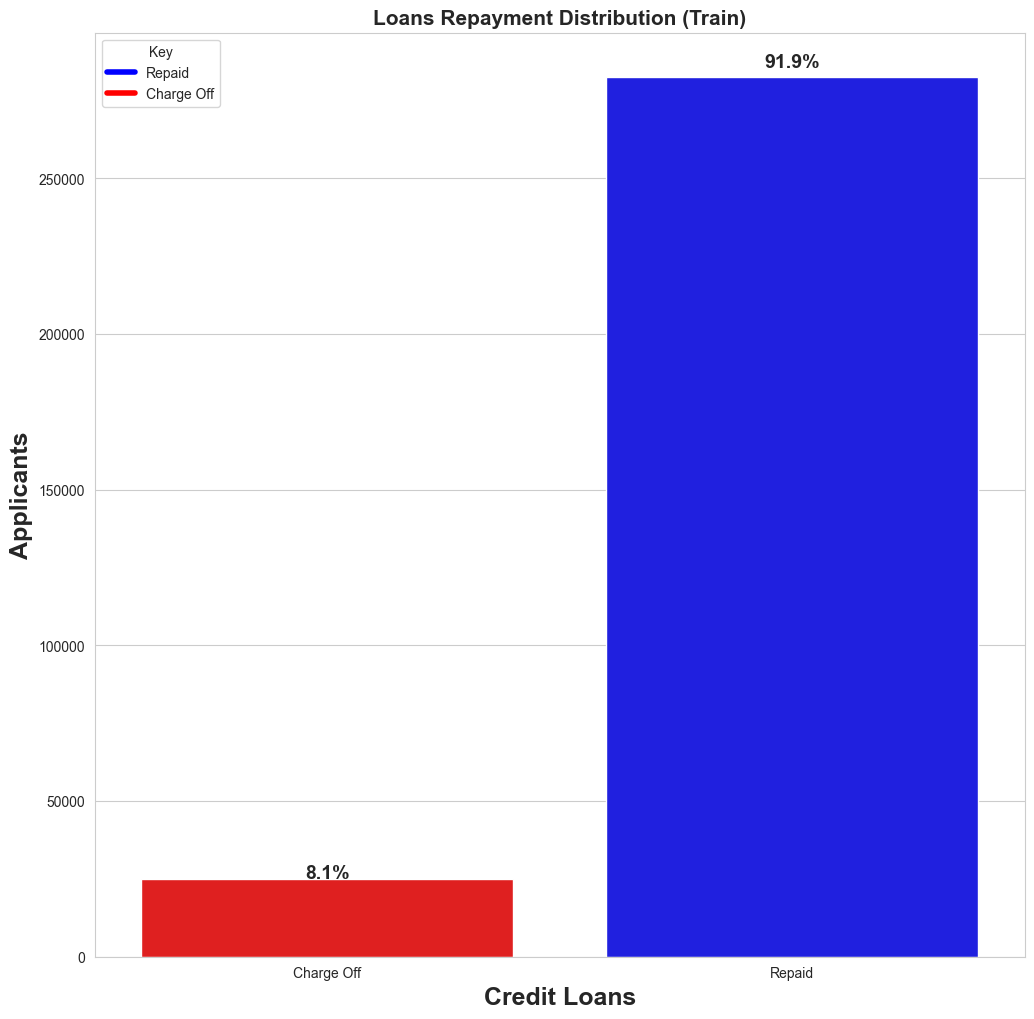

In [142]:
custom_palette = {"Repaid": 'blue', "Charge Off": 'red'}
app_train['target'] = app_train['target'].replace({0: "Repaid", 1: "Charge Off"})
total_count = len(app_train)

value_counts = app_train['target'].value_counts()
percentages = (value_counts / total_count) * 100

fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.countplot(x='target', data=app_train, hue='target', palette=custom_palette, legend=False)

for p in ax.patches:
    height = p.get_height()
    percentage = f"{(height / total_count) * 100:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2, height + height * 0.01 + 50,  
            percentage, ha='center', fontsize=14, weight="bold")

plt.xlabel("Credit Loans", fontsize=18, weight="bold")
plt.ylabel("Applicants", fontsize=18, weight="bold")
plt.title("Loans Repayment Distribution (Train)", fontsize=15, weight="bold")
plt.xticks([0, 1], ["Charge Off", "Repaid"])

handles = [plt.Line2D([0], [0], color=custom_palette["Repaid"], lw=4, label='Repaid'),
           plt.Line2D([0], [0], color=custom_palette["Charge Off"], lw=4, label='Charge Off')]

plt.legend(handles=handles, title='Key')
plt.show()


In [143]:
app_train['days_birth'] = abs(app_train['days_birth'])

age_data = app_train[['target', 'days_birth']]
age_data['years_birth'] = abs(age_data['days_birth']) / 365

age_data['years_binned'] = pd.cut(age_data['years_birth'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,target,days_birth,years_birth,years_binned
0,Charge Off,9461,25.920548,"(25.0, 30.0]"
1,Repaid,16765,45.931507,"(45.0, 50.0]"
2,Repaid,19046,52.180822,"(50.0, 55.0]"
3,Repaid,19005,52.068493,"(50.0, 55.0]"
4,Repaid,19932,54.608219,"(50.0, 55.0]"
5,Repaid,16941,46.413699,"(45.0, 50.0]"
6,Repaid,13778,37.747945,"(35.0, 40.0]"
7,Repaid,18850,51.643836,"(50.0, 55.0]"
8,Repaid,20099,55.065753,"(55.0, 60.0]"
9,Repaid,14469,39.641096,"(35.0, 40.0]"


************************************************************************************************************************************************************************************************************************************

**Presented in Absolute Values**

In [144]:
age_data = app_train[['target', 'days_birth']]
app_train['days_birth'] = abs(app_train['days_birth'])
age_data['years_birth'] = abs(age_data['days_birth']) / 365

age_data['years_binned'] = pd.cut(age_data['years_birth'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,target,days_birth,years_birth,years_binned
0,Charge Off,9461,25.920548,"(25.0, 30.0]"
1,Repaid,16765,45.931507,"(45.0, 50.0]"
2,Repaid,19046,52.180822,"(50.0, 55.0]"
3,Repaid,19005,52.068493,"(50.0, 55.0]"
4,Repaid,19932,54.608219,"(50.0, 55.0]"
5,Repaid,16941,46.413699,"(45.0, 50.0]"
6,Repaid,13778,37.747945,"(35.0, 40.0]"
7,Repaid,18850,51.643836,"(50.0, 55.0]"
8,Repaid,20099,55.065753,"(55.0, 60.0]"
9,Repaid,14469,39.641096,"(35.0, 40.0]"


*************************************************************************************************

# Pre-Processing

**************************************************************************************************

Segregating Binary, Categorical & Numerical Features

In [145]:
binary_features = app_train.select_dtypes(include=['object']).nunique()[app_train.select_dtypes(include=['object']).nunique() == 2].index.tolist()
categorical_features = app_train.select_dtypes(include=['object']).nunique()[app_train.select_dtypes(include=['object']).nunique() > 2].index.tolist()
numerical_features = app_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [146]:
categorical_features = [col for col in categorical_features if col not in binary_features]
print(f"Number of binary features: {len(binary_features)}")
print(f"Number of categorical features: {len(categorical_features)}")
print(f"Number of numerical features: {len(numerical_features)}")

Number of binary features: 5
Number of categorical features: 12
Number of numerical features: 105


In [147]:
print("Binary features:")
print(binary_features)
print("\nCategorical features:")
print(categorical_features)
print("\nNumerical features:")
print(numerical_features)

Binary features:
['target', 'name_contract_type', 'flag_own_car', 'flag_own_realty', 'emergencystate_mode']

Categorical features:
['code_gender', 'name_type_suite', 'name_income_type', 'name_education_type', 'name_family_status', 'name_housing_type', 'occupation_type', 'weekday_appr_process_start', 'organization_type', 'fondkapremont_mode', 'housetype_mode', 'wallsmaterial_mode']

Numerical features:
['sk_id_curr', 'cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price', 'region_population_relative', 'days_birth', 'days_employed', 'days_registration', 'days_id_publish', 'own_car_age', 'flag_mobil', 'flag_emp_phone', 'flag_work_phone', 'flag_cont_mobile', 'flag_phone', 'flag_email', 'cnt_fam_members', 'region_rating_client', 'region_rating_client_w_city', 'hour_appr_process_start', 'reg_region_not_live_region', 'reg_region_not_work_region', 'live_region_not_work_region', 'reg_city_not_live_city', 'reg_city_not_work_city', 'live_city_not_work_city', 'ext_sourc

**************************************************************************************************

# Pipeline

*************************************************************************************************

Verifying congruency between two variables

In [148]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [149]:
binary_pipe = Pipeline([
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

categorical_pipe = Pipeline([
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numerical_pipe = Pipeline([
       ('imputer1', SimpleImputer(strategy='median')),
       ('imputer2', KNNImputer()),
       ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
       transformers=[
       ('binary', binary_pipe, binary_features),
       ('categorical', categorical_pipe, categorical_features),
       ('numerical', numerical_pipe, numerical_features)
],
       remainder='drop',
       verbose_feature_names_out=True
)

************************************************************************************************************************************************************************************************************************************

# Splits

************************************************************************************************************************************************************************************************************************************

In [150]:
X = app_train.drop(columns=['target'])
y = app_train['target']

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)

In [153]:
X_train.shape, y_train.shape 

((261384, 121), (261384,))

In [154]:
X_test.shape, y_test.shape

((46127, 121), (46127,))

Filling categorical nulls with one-hot encoding

In [155]:
X_train.shape

(261384, 121)

In [156]:
y_train.shape

(261384,)

In [159]:
X_test = pd.get_dummies(X_test)
X_test

,sk_id_curr,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,...,housetype_mode_terraced house,wallsmaterial_mode_Block,wallsmaterial_mode_Mixed,wallsmaterial_mode_Monolithic,wallsmaterial_mode_Others,wallsmaterial_mode_Panel,"wallsmaterial_mode_Stone, brick",wallsmaterial_mode_Wooden,emergencystate_mode_No,emergencystate_mode_Yes
10246,111929,1,157500.0,450000.0,16807.5,450000.0,0.028663,10559,-320,-1686.0,...,False,False,False,False,False,False,True,False,True,False
503,100580,0,270000.0,528318.0,26973.0,441000.0,0.007330,19008,-1689,-6713.0,...,False,False,False,False,False,True,False,False,True,False
36369,142116,1,157500.0,91647.0,8532.0,76500.0,0.025164,9720,-95,-1056.0,...,False,False,False,False,False,True,False,False,True,False
111030,228811,0,90000.0,225000.0,15219.0,225000.0,0.024610,9867,-933,-3718.0,...,False,False,False,False,False,True,False,False,True,False
69864,181044,2,225000.0,284256.0,28111.5,270000.0,0.010006,16185,-1288,-2961.0,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274380,418047,1,76500.0,119925.0,13045.5,112500.0,0.026392,9295,-430,-2298.0,...,False,False,False,False,False,True,False,False,True,False
61881,171770,0,90000.0,284400.0,16011.0,225000.0,0.031329,19510,-4164,-11191.0,...,False,False,False,False,False,False,False,True,False,True
146436,269792,0,157500.0,646920.0,20997.0,540000.0,0.010147,17415,-1540,-9120.0,...,False,False,False,False,False,True,False,False,True,False
227965,364050,0,78750.0,47970.0,4873.5,45000.0,0.024610,20906,365243,-4342.0,...,False,False,False,False,False,True,False,False,True,False


In [160]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [177]:
import xgboost as xgbooster
from imblearn.over_sampling import SMOTE

In [162]:
smote = SMOTE(sampling_strategy='auto') 

*******************************************************************************************************

# Analysis 2: X & Y train

************************************************************************************************************************************************************************************************************************************

In [163]:
print(f"X_train shape after split: {X_train.shape}")  
print(f"y_train shape after split: {y_train.shape}")

print(X.index.equals(y.index))

X_train shape after split: (261384, 245)
y_train shape after split: (261384,)
True


In [164]:
X_train.dtypes.value_counts()

bool       140
float64     65
int64       40
Name: count, dtype: int64

In [165]:
X_test.dtypes.value_counts()


bool       139
float64     65
int64       41
Name: count, dtype: int64

*************************************************************************************************

# CLASSIFICATION & PREDICTION

*************************************************************************************************

Employing Classifier because the target variable is a discrete value.

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [167]:
issatree = DecisionTreeClassifier (random_state= 4)

In [168]:
issatree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

In [169]:
firstpreds = issatree.predict(X_test)

In [170]:
first_preds_proba = issatree.predict_proba(X_test)
first_preds_proba

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [171]:
first_preds_proba[: , 1]

array([1., 1., 0., ..., 1., 1., 1.])

In [172]:
from sklearn.metrics import classification_report

In [173]:
print(classification_report(y_test, firstpreds))

              precision    recall  f1-score   support

  Charge Off       0.14      0.16      0.15      3745
      Repaid       0.92      0.91      0.92     42382

    accuracy                           0.85     46127
   macro avg       0.53      0.54      0.53     46127
weighted avg       0.86      0.85      0.86     46127



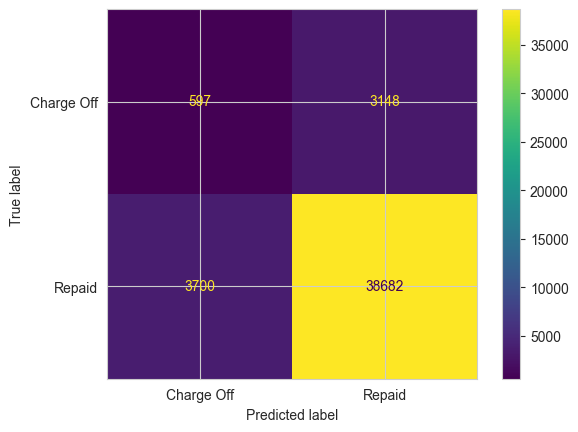

In [174]:
ConfusionMatrixDisplay.from_predictions(y_test, firstpreds)

************************************************************************************************

# Submission

************************************************************************************************

Kaggle Submission code

In [175]:
submission = pd.DataFrame()
submission['sk_id_curr'] = X_test['sk_id_curr']
submission['target'] = first_preds_proba [:,1]
submission

,sk_id_curr,target
10246,111929,1.0
503,100580,1.0
36369,142116,0.0
111030,228811,1.0
69864,181044,1.0
...,...,...
274380,418047,1.0
61881,171770,1.0
146436,269792,1.0
227965,364050,1.0


In [176]:
submission.to_csv(r'C:\Users\ramad\Desktop\CODING\Spreadsheets\home-credit-default-risk\sub1-homecreditdefaultrisk.csv')

************************************************************************************************